In [1]:
# DataSet : Kenya_1981_2023_detrended_var_MODIFIED

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
import statsmodels.formula.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [4]:
#!pip install catboost

In [5]:
# Import Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

#import the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
df = pd.read_csv('Kenya_1981_2023_detrended_var_MODIFIED.csv')
df.head()

,Unnamed: 0,area,year,area_harvested_usda_1000ha,production_usda_1000ha,yield_usda_1000ha,area_harvested_fao_1000ha,production_fao_1000ha,yield_fao_1000ha,dew_temp_C,...,evaporation_mm,precipitation_era5_mm,wind_eastward_m_s,wind_northward_m_s,soil_water_L1_fraction,soil_water_L2_fraction,soil_water_L3_fraction,soil_water_L4_fraction,precipitation_chirps_mm,Yield (MT/HA)
0,21,Kenya,1981,131.255814,400.223044,0.108689,-9.299453,-257.699777,-0.183286,0.262262,...,-35.193987,85.864337,-0.012312,-0.084156,0.006795,0.007832,0.009991,0.002788,116.347990,1.48
1,22,Kenya,1982,147.717608,214.057385,-0.009067,51.804412,438.386153,0.313478,0.550392,...,-77.266848,104.564986,0.069529,-0.137766,0.016485,0.012594,0.003841,0.001746,147.287817,1.37
2,23,Kenya,1983,136.179402,-141.108275,-0.206823,116.908277,198.472083,0.015642,0.642850,...,-12.259414,3.104755,0.038095,-0.024727,-0.002066,-0.000912,0.003322,0.002588,-95.883328,1.18
3,24,Kenya,1984,30.641196,-477.273935,-0.334579,-224.987857,-717.441987,-0.305693,-0.847865,...,66.445984,-137.622346,-0.158085,-0.003519,-0.011966,-0.011189,-0.011569,-0.002990,-95.505084,1.06
4,25,Kenya,1985,177.102990,508.560405,0.137665,174.116008,252.643943,-0.023029,-0.212883,...,-33.873441,48.956359,0.049787,-0.007915,0.007368,0.009229,0.011241,0.001420,-3.477588,1.54


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  43 non-null     int64  
 1   area                        43 non-null     object 
 2   year                        43 non-null     int64  
 3   area_harvested_usda_1000ha  43 non-null     float64
 4   production_usda_1000ha      43 non-null     float64
 5   yield_usda_1000ha           43 non-null     float64
 6   area_harvested_fao_1000ha   43 non-null     float64
 7   production_fao_1000ha       43 non-null     float64
 8   yield_fao_1000ha            43 non-null     float64
 9   dew_temp_C                  43 non-null     float64
 10  soil_temp_L1_C              43 non-null     float64
 11  soil_temp_L2_C              43 non-null     float64
 12  soil_temp_L3_C              43 non-null     float64
 13  soil_temp_L4_C              43 non-nu

In [8]:
df.shape

(43, 28)

In [9]:
df = df.drop(columns=["Unnamed: 0", "area"])

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

year                          0
area_harvested_usda_1000ha    0
production_usda_1000ha        0
yield_usda_1000ha             0
area_harvested_fao_1000ha     0
production_fao_1000ha         0
yield_fao_1000ha              0
dew_temp_C                    0
soil_temp_L1_C                0
soil_temp_L2_C                0
soil_temp_L3_C                0
soil_temp_L4_C                0
irradiation_J_m2              0
temp_C                        0
max_temp_C                    0
min_temp_C                    0
evaporation_mm                0
precipitation_era5_mm         0
wind_eastward_m_s             0
wind_northward_m_s            0
soil_water_L1_fraction        0
soil_water_L2_fraction        0
soil_water_L3_fraction        0
soil_water_L4_fraction        0
precipitation_chirps_mm       0
Yield (MT/HA)                 0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,43.0,2.002000e+03,1.255654e+01,1.981000e+03,1.991500e+03,2002.000000,2.012500e+03,2.023000e+03
area_harvested_usda_1000ha,43.0,7.162789e-09,1.724983e+02,-5.191229e+02,-1.288123e+02,39.880399,1.337176e+02,3.054186e+02
production_usda_1000ha,43.0,-6.278990e-10,3.904004e+02,-7.677649e+02,-3.005902e+02,7.424947,3.305906e+02,6.120936e+02
yield_usda_1000ha,43.0,-6.454785e-19,1.755875e-01,-4.543824e-01,-1.132815e-01,0.010106,1.274479e-01,3.803020e-01
area_harvested_fao_1000ha,43.0,8.372097e-10,1.362638e+02,-3.965835e+02,-7.138515e+01,-9.299453,1.077744e+02,2.669218e+02
production_fao_1000ha,43.0,2.581396e-09,3.775832e+02,-7.174420e+02,-2.741421e+02,-4.840475,2.791500e+02,6.827299e+02
yield_fao_1000ha,43.0,1.395349e-10,1.783464e-01,-3.509908e-01,-1.582870e-01,-0.020001,1.409066e-01,3.322476e-01
dew_temp_C,43.0,4.651161e-11,4.520133e-01,-1.121086e+00,-2.214002e-01,-0.024900,2.687847e-01,1.148076e+00
soil_temp_L1_C,43.0,2.325581e-11,3.133868e-01,-7.386819e-01,-1.689060e-01,0.055670,1.875198e-01,5.580741e-01
soil_temp_L2_C,43.0,-6.976743e-11,3.129464e-01,-7.258317e-01,-1.512349e-01,0.049630,2.024336e-01,5.476129e-01


# Insight into 'Yield (MT/HA)' - Histogram Plot

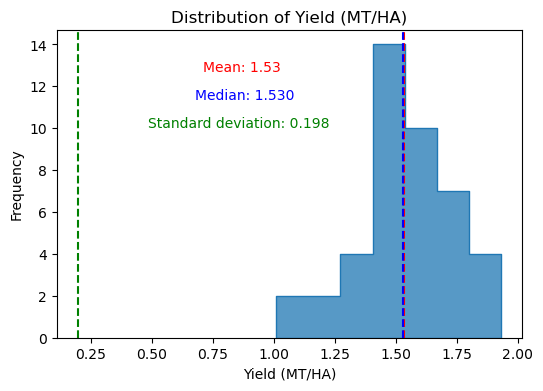

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Yield (MT/HA)', element='step', common_norm=False)


mean = np.mean(df['Yield (MT/HA)'])
median = np.median(df['Yield (MT/HA)'])
std_deviation = np.std(df['Yield (MT/HA)'])

plt.axvline(mean, color='red', linestyle='--')
plt.axvline(median, color='blue', linestyle='--')
plt.axvline(x=std_deviation, color='green', linestyle='--')

# annotate mean,median & Standard deviation
plt.annotate(f'Mean: {mean:.3}', xy=(mean, plt.gca().get_ylim()[1]), xytext=(-145, -30),
             textcoords='offset points', color='red', fontsize=10)
plt.annotate(f'Median: {median:.3f}', xy=(median, plt.gca().get_ylim()[1]), xytext=(-150, -50),
             textcoords='offset points', color='blue', fontsize=10)
plt.annotate(f'Standard deviation: {std_deviation:.3f}', xy=(std_deviation, plt.gca().get_ylim()[1]), xytext=(50, -70),
           textcoords='offset points', color='green', fontsize=10)
plt.xlabel('Yield (MT/HA)')
plt.ylabel('Frequency')
plt.title('Distribution of Yield (MT/HA)')
plt.show()

# Corrolation Analysis

In [13]:
df_corr = df.corr(method='pearson')
df_corr= df_corr.applymap("{:.3f}".format)
df_corr

,year,area_harvested_usda_1000ha,production_usda_1000ha,yield_usda_1000ha,area_harvested_fao_1000ha,production_fao_1000ha,yield_fao_1000ha,dew_temp_C,soil_temp_L1_C,soil_temp_L2_C,...,evaporation_mm,precipitation_era5_mm,wind_eastward_m_s,wind_northward_m_s,soil_water_L1_fraction,soil_water_L2_fraction,soil_water_L3_fraction,soil_water_L4_fraction,precipitation_chirps_mm,Yield (MT/HA)
year,1.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,...,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.485
area_harvested_usda_1000ha,-0.000,1.000,0.603,-0.151,0.799,0.571,0.160,0.295,-0.049,-0.040,...,-0.257,0.299,0.263,-0.324,0.308,0.295,0.251,0.083,0.179,-0.132
production_usda_1000ha,0.000,0.603,1.000,0.691,0.618,0.920,0.706,0.452,-0.255,-0.248,...,-0.506,0.593,0.567,-0.432,0.562,0.535,0.401,0.033,0.454,0.604
yield_usda_1000ha,0.000,-0.151,0.691,1.000,0.052,0.619,0.740,0.286,-0.238,-0.237,...,-0.369,0.438,0.435,-0.213,0.394,0.373,0.247,-0.058,0.369,0.874
area_harvested_fao_1000ha,-0.000,0.799,0.618,0.052,1.000,0.641,0.103,0.239,-0.005,-0.002,...,-0.227,0.314,0.228,-0.074,0.278,0.267,0.212,-0.003,0.146,0.045
production_fao_1000ha,-0.000,0.571,0.920,0.619,0.641,1.000,0.814,0.518,-0.244,-0.243,...,-0.524,0.580,0.594,-0.387,0.560,0.523,0.390,0.042,0.411,0.542
yield_fao_1000ha,-0.000,0.160,0.706,0.740,0.103,0.814,1.000,0.490,-0.251,-0.253,...,-0.464,0.470,0.561,-0.423,0.479,0.435,0.304,0.044,0.376,0.647
dew_temp_C,-0.000,0.295,0.452,0.286,0.239,0.518,0.490,1.000,-0.460,-0.474,...,-0.874,0.786,0.736,-0.575,0.824,0.831,0.772,0.385,0.630,0.250
soil_temp_L1_C,0.000,-0.049,-0.255,-0.238,-0.005,-0.244,-0.251,-0.460,1.000,0.997,...,0.726,-0.653,-0.669,0.324,-0.739,-0.743,-0.687,-0.427,-0.599,-0.208
soil_temp_L2_C,-0.000,-0.040,-0.248,-0.237,-0.002,-0.243,-0.253,-0.474,0.997,1.000,...,0.740,-0.640,-0.680,0.326,-0.734,-0.749,-0.713,-0.455,-0.569,-0.207


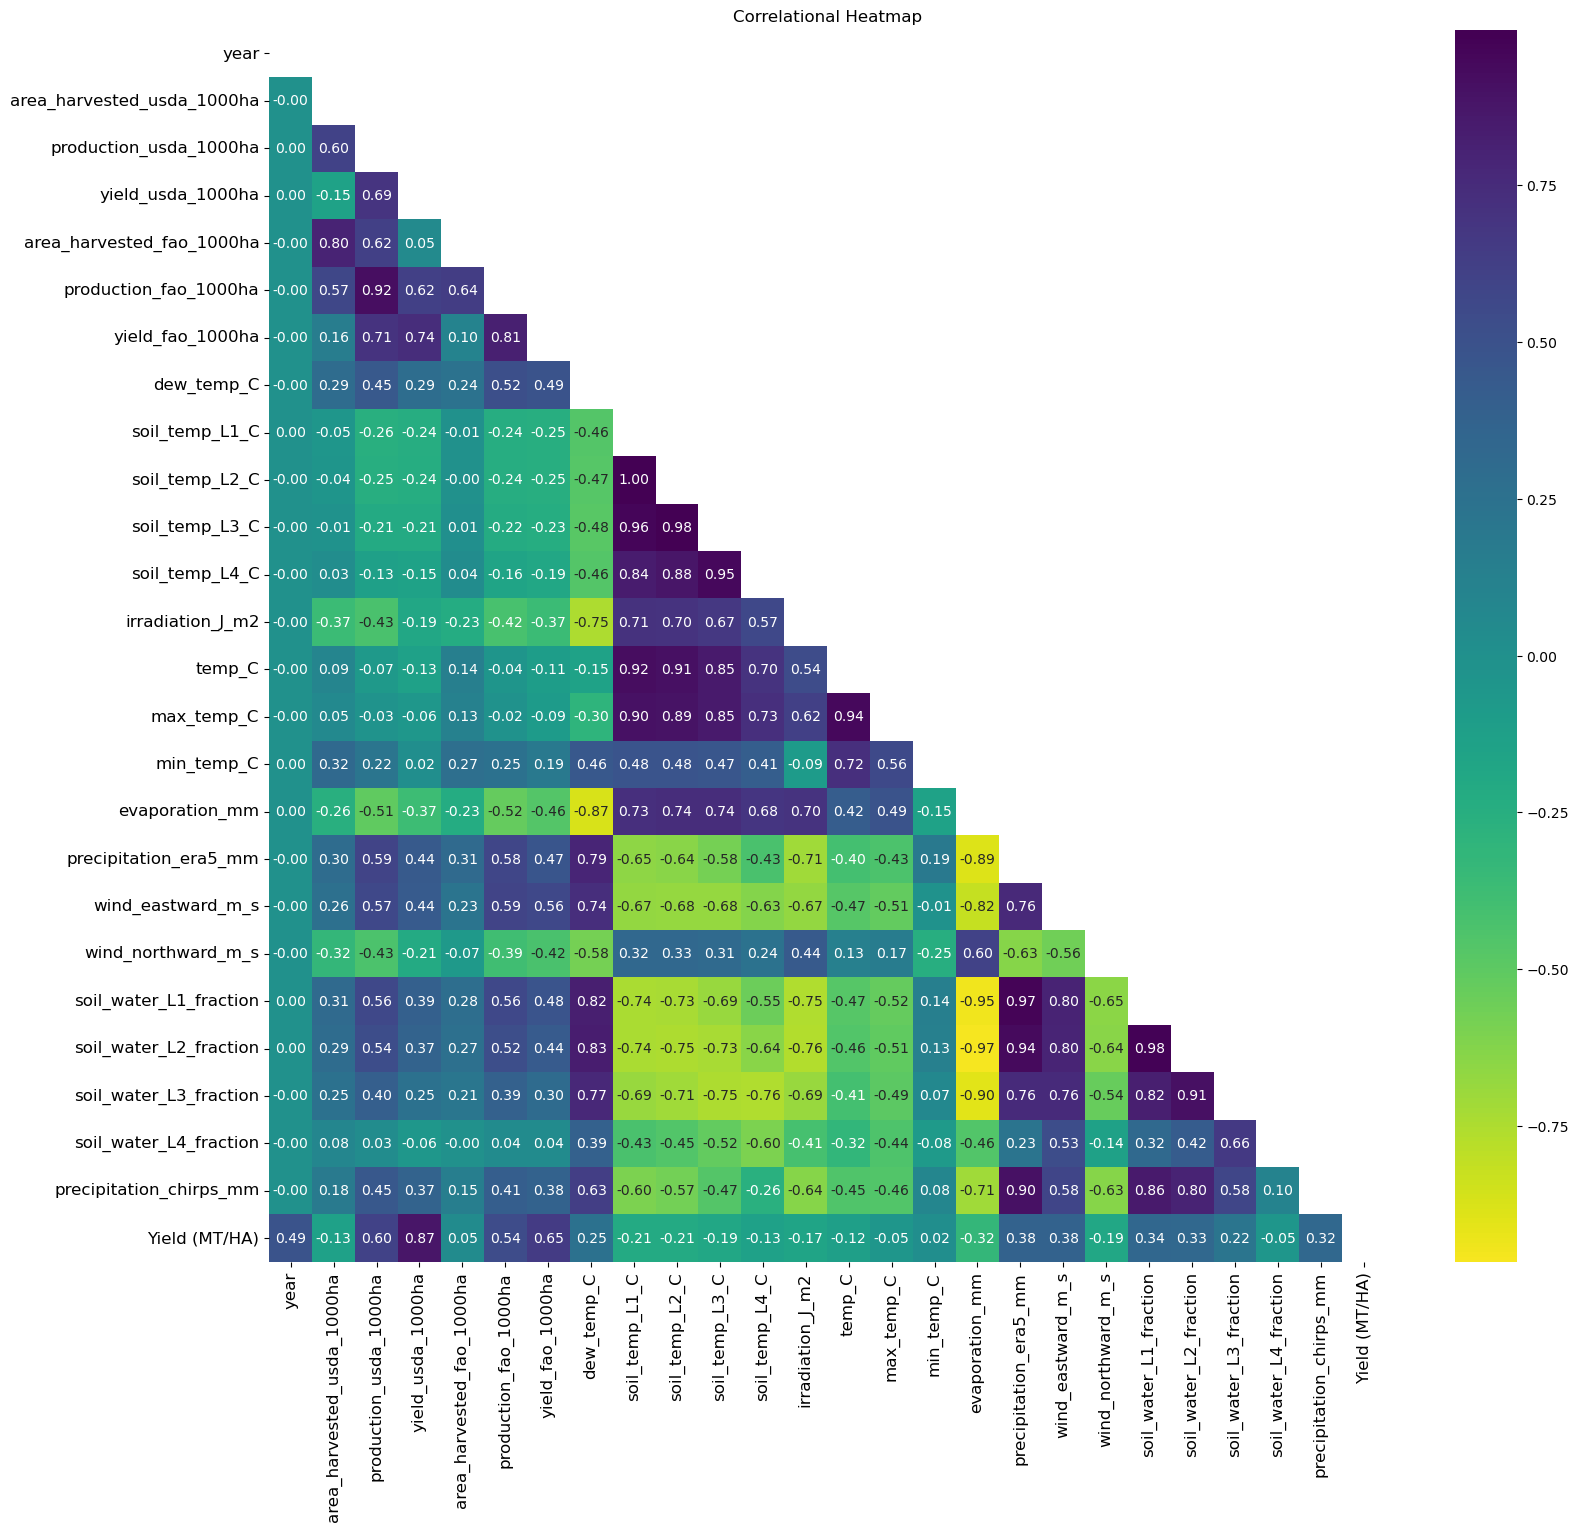

In [14]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(18, 16))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r', center=0, mask=mask, fmt=".2f")
plt.xticks(rotation = 90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlational Heatmap')
plt.show()

In [15]:
df_corr['Yield (MT/HA)'].sort_values(ascending=False)

Yield (MT/HA)                  1.000
yield_usda_1000ha              0.874
yield_fao_1000ha               0.647
production_usda_1000ha         0.604
production_fao_1000ha          0.542
year                           0.485
precipitation_era5_mm          0.383
wind_eastward_m_s              0.380
soil_water_L1_fraction         0.344
soil_water_L2_fraction         0.326
precipitation_chirps_mm        0.322
dew_temp_C                     0.250
soil_water_L3_fraction         0.216
area_harvested_fao_1000ha      0.045
min_temp_C                     0.016
evaporation_mm                -0.323
soil_temp_L1_C                -0.208
soil_temp_L2_C                -0.207
wind_northward_m_s            -0.187
soil_temp_L3_C                -0.186
irradiation_J_m2              -0.167
area_harvested_usda_1000ha    -0.132
soil_temp_L4_C                -0.132
temp_C                        -0.116
soil_water_L4_fraction        -0.051
max_temp_C                    -0.049
Name: Yield (MT/HA), dtype: object

# Modeling - Target: "Yield (MT/HA)" - All Features

In [16]:
df.columns

Index(['year', 'area_harvested_usda_1000ha', 'production_usda_1000ha',
       'yield_usda_1000ha', 'area_harvested_fao_1000ha',
       'production_fao_1000ha', 'yield_fao_1000ha', 'dew_temp_C',
       'soil_temp_L1_C', 'soil_temp_L2_C', 'soil_temp_L3_C', 'soil_temp_L4_C',
       'irradiation_J_m2', 'temp_C', 'max_temp_C', 'min_temp_C',
       'evaporation_mm', 'precipitation_era5_mm', 'wind_eastward_m_s',
       'wind_northward_m_s', 'soil_water_L1_fraction',
       'soil_water_L2_fraction', 'soil_water_L3_fraction',
       'soil_water_L4_fraction', 'precipitation_chirps_mm', 'Yield (MT/HA)'],
      dtype='object')

In [17]:
# Columns to exclude = "year", 'yield_fao_1000ha', 'yield_usda_1000ha'

num_var = ['area_harvested_usda_1000ha', 'production_usda_1000ha',
        'area_harvested_fao_1000ha',
       'production_fao_1000ha', 'dew_temp_C',
       'soil_temp_L1_C', 'soil_temp_L2_C', 'soil_temp_L3_C', 'soil_temp_L4_C',
       'irradiation_J_m2', 'temp_C', 'max_temp_C', 'min_temp_C',
       'evaporation_mm', 'precipitation_era5_mm', 'wind_eastward_m_s',
       'wind_northward_m_s', 'soil_water_L1_fraction',
       'soil_water_L2_fraction', 'soil_water_L3_fraction',
       'soil_water_L4_fraction', 'precipitation_chirps_mm']

cat_var = []

y = df['Yield (MT/HA)']

X = df[cat_var + num_var]
y = pd.DataFrame(y, columns=['Yield (MT/HA)'])

In [18]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   area_harvested_usda_1000ha  43 non-null     float64
 1   production_usda_1000ha      43 non-null     float64
 2   area_harvested_fao_1000ha   43 non-null     float64
 3   production_fao_1000ha       43 non-null     float64
 4   dew_temp_C                  43 non-null     float64
 5   soil_temp_L1_C              43 non-null     float64
 6   soil_temp_L2_C              43 non-null     float64
 7   soil_temp_L3_C              43 non-null     float64
 8   soil_temp_L4_C              43 non-null     float64
 9   irradiation_J_m2            43 non-null     float64
 10  temp_C                      43 non-null     float64
 11  max_temp_C                  43 non-null     float64
 12  min_temp_C                  43 non-null     float64
 13  evaporation_mm              43 non-nu

In [20]:
# Train-test split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 , shuffle=True)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (30, 22)
X_test.shape: (13, 22)
y_train.shape: (30, 1)
y_test.shape: (13, 1)


In [21]:
# Preprocessing with pipelines

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


pipeline_categorical = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore")),])

pipeline_numerical = Pipeline([('scaler', MinMaxScaler(feature_range=(0,1))),])

pipeline_full = ColumnTransformer([("categorical", pipeline_categorical, cat_var),
                                   ("numerical", pipeline_numerical, num_var)])

In [22]:
# Apply the pipeline

pipeline_full.fit(X_train)

X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)

print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print()
print('X_train_transformed:', type(X_train_transformed))
print('X_test_transformed:', type(X_test_transformed))

X_train_transformed.shape: (30, 22)
X_test_transformed.shape: (13, 22)

X_train_transformed: <class 'numpy.ndarray'>
X_test_transformed: <class 'numpy.ndarray'>


In [23]:
models = {
    'LinearRegression': LinearRegression(),
    'LassoRegressor': Lasso(max_iter=10000, random_state=42),
    'RidgeRegressor': Ridge(max_iter=10000, random_state=42),
    "ElasticNet": ElasticNet(alpha=0.02, random_state=42),
    # "KNN": KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(random_state=42),
    'SVR': SVR(),
    'RFR': RandomForestRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=5, random_state=42),
    'ADABoost': AdaBoostRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

In [24]:
# Train multiple models

model_list=[]
r2_list=[]
mae_list=[]
mse_list=[]
rmse_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_transformed,y_train)

    #Make Predictions
    y_pred=model.predict(X_test_transformed)

    # Evaluation Metric:
    #r2 = model.score(X_test_transformed, y_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mean_squared_error(y_test, y_pred))

    model_list.append(list(models.keys())[i])
    r2_list.append(r2)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)

    # Print the performance metrics for each model
    print(f"Model: {list(models.keys())[i]}")
    print(f"R2 Score: {r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print("="*30)

Model: LinearRegression
R2 Score: -0.2899680949880774
MAE: 0.2449974637791559
MSE: 0.08205113037801086
RMSE: 0.2864456848654049
Model: LassoRegressor
R2 Score: -0.0008219840738261652
MAE: 0.19338461538461532
MSE: 0.06365938461538462
RMSE: 0.25230811444617596
Model: RidgeRegressor
R2 Score: 0.4017870902649986
MAE: 0.15080164878501157
MSE: 0.03805058872477734
RMSE: 0.19506560108019388
Model: ElasticNet
R2 Score: 0.3111029317937445
MAE: 0.16252002081095276
MSE: 0.04381874511473351
RMSE: 0.20932927438543686
Model: DTR
R2 Score: -0.617381111855325
MAE: 0.23230769230769235
MSE: 0.10287692307692307
RMSE: 0.32074432664806884
Model: SVR
R2 Score: -0.04287309737378453
MAE: 0.21993011631583564
MSE: 0.06633413400904871
RMSE: 0.25755413801577465
Model: RFR
R2 Score: -0.013081004874599733
MAE: 0.20623846153846126
MSE: 0.06443914538461536
RMSE: 0.25384866630458264
Model: ExtraTrees
R2 Score: 0.050067351343305866
MAE: 0.21584615384615385
MSE: 0.06042246153846153
RMSE: 0.24580980765311528
Model: ADABoo

131:	learn: 0.0812259	total: 2.02s	remaining: 13.3s
132:	learn: 0.0806368	total: 2.03s	remaining: 13.2s
133:	learn: 0.0801853	total: 2.03s	remaining: 13.1s
134:	learn: 0.0797626	total: 2.04s	remaining: 13.1s
135:	learn: 0.0792554	total: 2.04s	remaining: 13s
136:	learn: 0.0788177	total: 2.06s	remaining: 12.9s
137:	learn: 0.0784442	total: 2.08s	remaining: 13s
138:	learn: 0.0779794	total: 2.11s	remaining: 13.1s
139:	learn: 0.0775600	total: 2.13s	remaining: 13.1s
140:	learn: 0.0769834	total: 2.15s	remaining: 13.1s
141:	learn: 0.0765622	total: 2.17s	remaining: 13.1s
142:	learn: 0.0762084	total: 2.2s	remaining: 13.2s
143:	learn: 0.0756783	total: 2.22s	remaining: 13.2s
144:	learn: 0.0751919	total: 2.23s	remaining: 13.1s
145:	learn: 0.0746866	total: 2.23s	remaining: 13.1s
146:	learn: 0.0744334	total: 2.24s	remaining: 13s
147:	learn: 0.0739419	total: 2.26s	remaining: 13s
148:	learn: 0.0735359	total: 2.27s	remaining: 13s
149:	learn: 0.0732740	total: 2.29s	remaining: 13s
150:	learn: 0.0728653	tot

294:	learn: 0.0294965	total: 4.44s	remaining: 10.6s
295:	learn: 0.0293211	total: 4.46s	remaining: 10.6s
296:	learn: 0.0292069	total: 4.47s	remaining: 10.6s
297:	learn: 0.0290459	total: 4.49s	remaining: 10.6s
298:	learn: 0.0288552	total: 4.5s	remaining: 10.6s
299:	learn: 0.0287143	total: 4.52s	remaining: 10.5s
300:	learn: 0.0285975	total: 4.53s	remaining: 10.5s
301:	learn: 0.0283527	total: 4.54s	remaining: 10.5s
302:	learn: 0.0280977	total: 4.56s	remaining: 10.5s
303:	learn: 0.0278775	total: 4.58s	remaining: 10.5s
304:	learn: 0.0277358	total: 4.59s	remaining: 10.5s
305:	learn: 0.0275035	total: 4.61s	remaining: 10.4s
306:	learn: 0.0273771	total: 4.62s	remaining: 10.4s
307:	learn: 0.0272477	total: 4.63s	remaining: 10.4s
308:	learn: 0.0270061	total: 4.65s	remaining: 10.4s
309:	learn: 0.0268500	total: 4.67s	remaining: 10.4s
310:	learn: 0.0267031	total: 4.7s	remaining: 10.4s
311:	learn: 0.0265468	total: 4.7s	remaining: 10.4s
312:	learn: 0.0264404	total: 4.71s	remaining: 10.3s
313:	learn: 0.0

461:	learn: 0.0097302	total: 6.9s	remaining: 8.03s
462:	learn: 0.0096644	total: 6.92s	remaining: 8.02s
463:	learn: 0.0096057	total: 6.95s	remaining: 8.03s
464:	learn: 0.0095409	total: 6.96s	remaining: 8.01s
465:	learn: 0.0094823	total: 6.98s	remaining: 8s
466:	learn: 0.0094250	total: 7s	remaining: 8s
467:	learn: 0.0093615	total: 7.03s	remaining: 7.99s
468:	learn: 0.0093042	total: 7.06s	remaining: 8s
469:	learn: 0.0092482	total: 7.08s	remaining: 7.98s
470:	learn: 0.0091912	total: 7.12s	remaining: 8s
471:	learn: 0.0091295	total: 7.12s	remaining: 7.97s
472:	learn: 0.0090749	total: 7.13s	remaining: 7.94s
473:	learn: 0.0090190	total: 7.13s	remaining: 7.92s
474:	learn: 0.0089586	total: 7.14s	remaining: 7.89s
475:	learn: 0.0089052	total: 7.14s	remaining: 7.86s
476:	learn: 0.0088505	total: 7.16s	remaining: 7.85s
477:	learn: 0.0087914	total: 7.18s	remaining: 7.85s
478:	learn: 0.0087392	total: 7.2s	remaining: 7.83s
479:	learn: 0.0086855	total: 7.21s	remaining: 7.81s
480:	learn: 0.0086277	total: 

621:	learn: 0.0038448	total: 9.58s	remaining: 5.82s
622:	learn: 0.0038223	total: 9.6s	remaining: 5.81s
623:	learn: 0.0037950	total: 9.62s	remaining: 5.8s
624:	learn: 0.0037815	total: 9.64s	remaining: 5.79s
625:	learn: 0.0037681	total: 9.66s	remaining: 5.77s
626:	learn: 0.0037446	total: 9.67s	remaining: 5.75s
627:	learn: 0.0037227	total: 9.7s	remaining: 5.74s
628:	learn: 0.0036947	total: 9.71s	remaining: 5.73s
629:	learn: 0.0036817	total: 9.73s	remaining: 5.71s
630:	learn: 0.0036688	total: 9.76s	remaining: 5.71s
631:	learn: 0.0036459	total: 9.79s	remaining: 5.7s
632:	learn: 0.0036199	total: 9.79s	remaining: 5.68s
633:	learn: 0.0036073	total: 9.8s	remaining: 5.66s
634:	learn: 0.0035948	total: 9.8s	remaining: 5.63s
635:	learn: 0.0035723	total: 9.82s	remaining: 5.62s
636:	learn: 0.0035455	total: 9.84s	remaining: 5.61s
637:	learn: 0.0035333	total: 9.85s	remaining: 5.59s
638:	learn: 0.0035225	total: 9.86s	remaining: 5.57s
639:	learn: 0.0035020	total: 9.87s	remaining: 5.55s
640:	learn: 0.0034

780:	learn: 0.0016121	total: 12.5s	remaining: 3.5s
781:	learn: 0.0016033	total: 12.5s	remaining: 3.48s
782:	learn: 0.0015946	total: 12.5s	remaining: 3.46s
783:	learn: 0.0015859	total: 12.5s	remaining: 3.44s
784:	learn: 0.0015773	total: 12.5s	remaining: 3.43s
785:	learn: 0.0015687	total: 12.6s	remaining: 3.42s
786:	learn: 0.0015602	total: 12.6s	remaining: 3.4s
787:	learn: 0.0015498	total: 12.6s	remaining: 3.38s
788:	learn: 0.0015380	total: 12.6s	remaining: 3.37s
789:	learn: 0.0015300	total: 12.6s	remaining: 3.35s
790:	learn: 0.0015221	total: 12.6s	remaining: 3.33s
791:	learn: 0.0015105	total: 12.6s	remaining: 3.32s
792:	learn: 0.0015043	total: 12.7s	remaining: 3.3s
793:	learn: 0.0014988	total: 12.7s	remaining: 3.29s
794:	learn: 0.0014874	total: 12.7s	remaining: 3.27s
795:	learn: 0.0014797	total: 12.7s	remaining: 3.26s
796:	learn: 0.0014737	total: 12.7s	remaining: 3.24s
797:	learn: 0.0014625	total: 12.7s	remaining: 3.23s
798:	learn: 0.0014587	total: 12.8s	remaining: 3.21s
799:	learn: 0.0

948:	learn: 0.0006244	total: 14.8s	remaining: 794ms
949:	learn: 0.0006185	total: 14.8s	remaining: 779ms
950:	learn: 0.0006161	total: 14.8s	remaining: 763ms
951:	learn: 0.0006138	total: 14.8s	remaining: 747ms
952:	learn: 0.0006080	total: 14.8s	remaining: 732ms
953:	learn: 0.0006057	total: 14.9s	remaining: 716ms
954:	learn: 0.0006004	total: 14.9s	remaining: 701ms
955:	learn: 0.0005984	total: 14.9s	remaining: 685ms
956:	learn: 0.0005961	total: 14.9s	remaining: 669ms
957:	learn: 0.0005941	total: 14.9s	remaining: 654ms
958:	learn: 0.0005901	total: 14.9s	remaining: 638ms
959:	learn: 0.0005862	total: 14.9s	remaining: 622ms
960:	learn: 0.0005823	total: 14.9s	remaining: 607ms
961:	learn: 0.0005777	total: 15s	remaining: 591ms
962:	learn: 0.0005745	total: 15s	remaining: 576ms
963:	learn: 0.0005728	total: 15s	remaining: 560ms
964:	learn: 0.0005708	total: 15s	remaining: 544ms
965:	learn: 0.0005670	total: 15s	remaining: 528ms
966:	learn: 0.0005632	total: 15s	remaining: 512ms
967:	learn: 0.0005595	to

In [25]:
# Find the index of the model with the best r2 score
best_index_r2 = r2_list.index(max(r2_list))

# Find the index of the model with the best mae score
best_index_mae = mae_list.index(min(mae_list))

# Find the index of the model with the best mse score
best_index_mse = mse_list.index(min(mse_list))

# Find the index of the model with the best rmse score
best_index_rmse = rmse_list.index(min(rmse_list))

# Determine the model with the best performance based on the chosen metric
best_r2_model = model_list[best_index_r2]
best_mae_model = model_list[best_index_mae]
best_mse_model = model_list[best_index_mse]
best_rmse_model = model_list[best_index_rmse]

# Print the best models and their corresponding metric
print("The model with the best R2 score is:", best_r2_model)
print("R2 score:", r2_list[best_index_r2])
print("="*40)
print("The model with the best MAE score is:", best_mae_model)
print("MAE:", mae_list[best_index_mae])
print("="*40)
print("The model with the best MSE score is:", best_mse_model)
print("MSE:", mse_list[best_index_mse])
print("="*40)
print("The model with the best RMSE score is:", best_rmse_model)
print("RMSE:", rmse_list[best_index_rmse])

The model with the best R2 score is: RidgeRegressor
R2 score: 0.4017870902649986
The model with the best MAE score is: RidgeRegressor
MAE: 0.15080164878501157
The model with the best MSE score is: RidgeRegressor
MSE: 0.03805058872477734
The model with the best RMSE score is: RidgeRegressor
RMSE: 0.19506560108019388


In [26]:
# Create a DF for Result:

results_df = pd.DataFrame({
    'Model': model_list,
    'R2 Score': r2_list,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list})

results_df.sort_values(by="RMSE", ascending=True)

,Model,R2 Score,MAE,MSE,RMSE
2,RidgeRegressor,0.401787,0.150802,0.038051,0.195066
3,ElasticNet,0.311103,0.162520,0.043819,0.209329
8,ADABoost,0.147772,0.188313,0.054208,0.232826
7,ExtraTrees,0.050067,0.215846,0.060422,0.245810
1,LassoRegressor,-0.000822,0.193385,0.063659,0.252308
11,LightGBM,-0.000822,0.193385,0.063659,0.252308
6,RFR,-0.013081,0.206238,0.064439,0.253849
5,SVR,-0.042873,0.219930,0.066334,0.257554
10,CatBoost,-0.064967,0.217822,0.067739,0.260268
0,LinearRegression,-0.289968,0.244997,0.082051,0.286446


# Top Model: Ridge Regressor

**Hyperparameter Search for Ridge Regression:**

In [27]:
# Hyperparameter Search for Ridge Regression:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

grid_search = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train_transformed, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='neg_mean_squared_error', verbose=1)

In [28]:
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'alpha': 0.1, 'solver': 'saga'}

 Ridge(alpha=0.1, solver='saga')


In [29]:
Tuned_Ridge_Reg = grid_search.best_estimator_
Tuned_Ridge_Reg

Ridge(alpha=0.1, solver='saga')

In [30]:
Tuned_Ridge_Reg .fit(X_train_transformed,y_train)
y_pred=Tuned_Ridge_Reg.predict(X_test_transformed)

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2 Score: 0.4473147636938627
MAE: 0.15271041049819783
MSE: 0.03515470542128079
RMSE: 0.18749588107817405


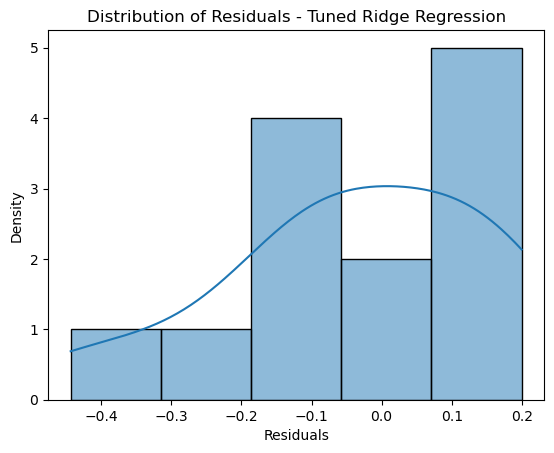

In [32]:
# Calculate residuals
residuals = y_test.values.flatten() - y_pred.flatten()

# Visualize residuals
#sns.kdeplot(residuals)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals - Tuned Ridge Regression')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

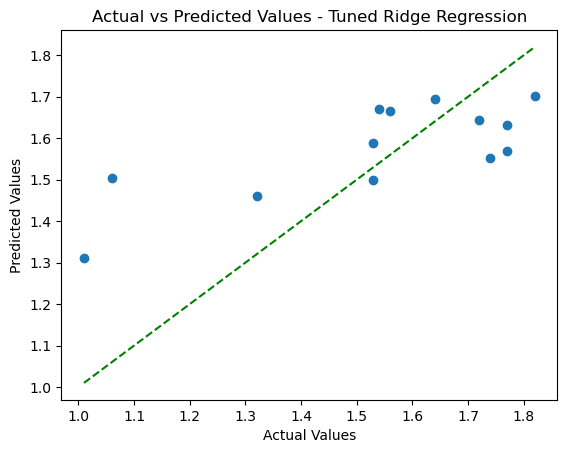

In [33]:
# Line Plot: Actual vs Predicted Values

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='green', label='Actual')
plt.scatter(y_test, y_pred, label='Tuned Ridge Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Tuned Ridge Regression')
plt.show()

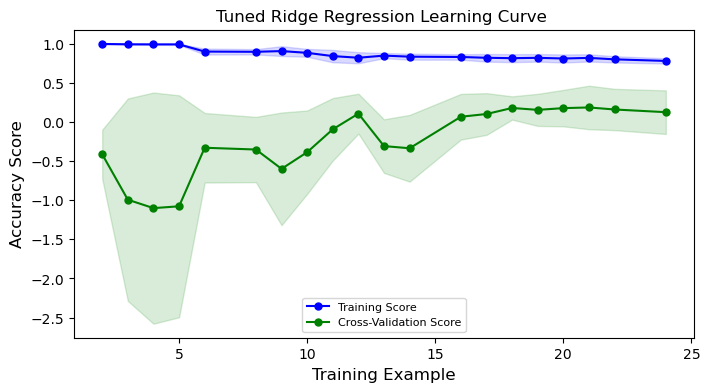

In [34]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=Tuned_Ridge_Reg, 
                                                       X=X_train_transformed, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 20), n_jobs=-1)

plt.figure(figsize=(8,4))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Tuned Ridge Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
plt.show()

# SHAP Values Analysis:

In [35]:
import shap

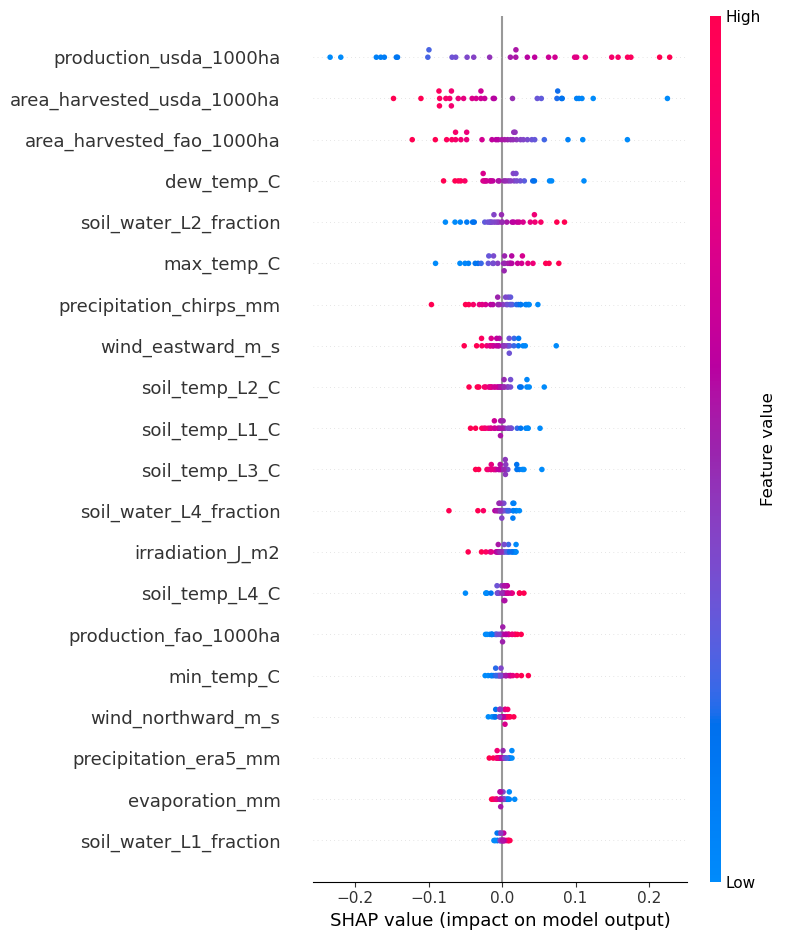

In [36]:
# Convert transformed array to DF with the actual feature names
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=num_var)

# Use SHAP for Tuned_Ridge_Reg
explainer = shap.Explainer(Tuned_Ridge_Reg, X_train_transformed_df)
shap_values = explainer(X_train_transformed_df)

# Generate the SHAP summary plot with correct feature names
shap.summary_plot(shap_values, X_train_transformed_df)

In [37]:
# Create a DF to display SHAP values
shap_values_df = pd.DataFrame(shap_values.values, columns=num_var)

# Calculate mean absolute SHAP values for feature importance
mean_abs_shap_values = shap_values_df.abs().mean().sort_values(ascending=False)

# Display the SHAP values for each feature
shap_values_table = pd.DataFrame({
    'Feature': mean_abs_shap_values.index,
    'Mean SHAP Value': mean_abs_shap_values.values})

shap_values_table

,Feature,Mean SHAP Value
0,production_usda_1000ha,0.111490
1,area_harvested_usda_1000ha,0.072852
2,area_harvested_fao_1000ha,0.046119
3,dew_temp_C,0.032206
4,soil_water_L2_fraction,0.029852
5,max_temp_C,0.028078
6,precipitation_chirps_mm,0.023633
7,wind_eastward_m_s,0.017516
8,soil_temp_L2_C,0.017253
9,soil_temp_L1_C,0.016702


Key insights from the SHAP and forward selection results:
* SHAP value analysis gives an indication of feature importance based on their average contribution to the model’s predictions. The top features with higher SHAP values are more influential.

* From SHAP, the top features are:  **"production_usda_1000ha", "area_harvested_usda_1000ha", "area_harvested_fao_1000ha", "dew_temp_C", 'soil_water_L2_fraction', "max_temp_C"**.

# Forward Feature Selection

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Perform forward feature selection
sfs_forward = SFS(Tuned_Ridge_Reg, 
                  k_features='best', 
                  forward=True, 
                  floating=False, 
                  scoring='neg_mean_squared_error', 
                  cv=5)

sfs_forward.fit(X_train_transformed, y_train.values.ravel())

# Selected features using forward selection
selected_features_forward_indices = sfs_forward.k_feature_idx_
selected_features_forward_names = [num_var[i] for i in selected_features_forward_indices]
print(f'Selected features (Forward): {selected_features_forward_names}')

Selected features (Forward): ['area_harvested_usda_1000ha', 'production_usda_1000ha', 'area_harvested_fao_1000ha', 'soil_water_L4_fraction']


* Forward feature selection optimizes for the best combination of features to minimize error (in this case, negative mean squared error).

* From forward selection, the selected features are: **'area_harvested_usda_1000ha', 'production_usda_1000ha', 'area_harvested_fao_1000ha', 'soil_water_L4_fraction'**.

**Final Selected Feature set from Top SHAP features and Forward selection features:**

'production_usda_1000ha'

'area_harvested_usda_1000ha'

'area_harvested_fao_1000ha'

'dew_temp_C'

'soil_water_L4_fraction'

'soil_water_L2_fraction'

'max_temp_C'

# Modeling - Target : 'Yield (MT/HA)' - Selected Features

In [39]:
num_var = ['production_usda_1000ha', 'area_harvested_usda_1000ha', 
           'area_harvested_fao_1000ha','dew_temp_C','soil_water_L4_fraction', 
           'soil_water_L2_fraction', 'max_temp_C']


cat_var = []

y = df['Yield (MT/HA)']

X = df[cat_var + num_var]
y = pd.DataFrame(y, columns=['Yield (MT/HA)'])

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   production_usda_1000ha      43 non-null     float64
 1   area_harvested_usda_1000ha  43 non-null     float64
 2   area_harvested_fao_1000ha   43 non-null     float64
 3   dew_temp_C                  43 non-null     float64
 4   soil_water_L4_fraction      43 non-null     float64
 5   soil_water_L2_fraction      43 non-null     float64
 6   max_temp_C                  43 non-null     float64
dtypes: float64(7)
memory usage: 2.5 KB


In [41]:
# Train-test split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 , shuffle=True)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (30, 7)
X_test.shape: (13, 7)
y_train.shape: (30, 1)
y_test.shape: (13, 1)


In [42]:
# Preprocessing with pipelines

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


pipeline_categorical = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore")),])

pipeline_numerical = Pipeline([('scaler', MinMaxScaler(feature_range=(0,1))),])

pipeline_full = ColumnTransformer([("categorical", pipeline_categorical, cat_var),
                                   ("numerical", pipeline_numerical, num_var)])

In [43]:
# Apply the pipeline

pipeline_full.fit(X_train)

X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)

print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print()
print('X_train_transformed:', type(X_train_transformed))
print('X_test_transformed:', type(X_test_transformed))

X_train_transformed.shape: (30, 7)
X_test_transformed.shape: (13, 7)

X_train_transformed: <class 'numpy.ndarray'>
X_test_transformed: <class 'numpy.ndarray'>


In [44]:
models = {
    'LinearRegression': LinearRegression(),
    'LassoRegressor': Lasso(max_iter=10000, random_state=42),
    'RidgeRegressor': Ridge(max_iter=10000, random_state=42),
    "ElasticNet": ElasticNet(alpha=0.02, random_state=42),
    # "KNN": KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(random_state=42),
    'SVR': SVR(),
    'RFR': RandomForestRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=5, random_state=42),
    'ADABoost': AdaBoostRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

In [45]:
# Train multiple models

model_list=[]
r2_list=[]
mae_list=[]
mse_list=[]
rmse_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_transformed,y_train)

    #Make Predictions
    y_pred=model.predict(X_test_transformed)

    # Evaluation Metric:
    #r2 = model.score(X_test_transformed, y_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mean_squared_error(y_test, y_pred))

    model_list.append(list(models.keys())[i])
    r2_list.append(r2)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)

    # Print the performance metrics for each model
    print(f"Model: {list(models.keys())[i]}")
    print(f"R2 Score: {r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print("="*30)

Model: LinearRegression
R2 Score: 0.6608879967961857
MAE: 0.11798792877568655
MSE: 0.02156993129964332
RMSE: 0.1468670531455007
Model: LassoRegressor
R2 Score: -0.0008219840738261652
MAE: 0.19338461538461532
MSE: 0.06365938461538462
RMSE: 0.25230811444617596
Model: RidgeRegressor
R2 Score: 0.39366648421138395
MAE: 0.15172800484975665
MSE: 0.038567116930895304
RMSE: 0.19638512400611025
Model: ElasticNet
R2 Score: 0.31111677362943935
MAE: 0.16251892894240957
MSE: 0.0438178646756981
RMSE: 0.2093271713746166
Model: DTR
R2 Score: -0.6084319416536426
MAE: 0.22307692307692303
MSE: 0.10230769230769228
RMSE: 0.31985573671218137
Model: SVR
R2 Score: 0.18930032673825725
MAE: 0.18559346936002835
MSE: 0.051566255666830936
RMSE: 0.22708204611292135
Model: RFR
R2 Score: 0.004762007888664765
MAE: 0.19252307692307696
MSE: 0.06330420307692312
RMSE: 0.25160326523501864
Model: ExtraTrees
R2 Score: -0.011236883232863981
MAE: 0.19569230769230764
MSE: 0.06432184615384612
RMSE: 0.253617519414267
Model: ADABoo

137:	learn: 0.0764565	total: 710ms	remaining: 4.44s
138:	learn: 0.0760916	total: 712ms	remaining: 4.41s
139:	learn: 0.0757469	total: 713ms	remaining: 4.38s
140:	learn: 0.0753420	total: 714ms	remaining: 4.35s
141:	learn: 0.0749835	total: 716ms	remaining: 4.32s
142:	learn: 0.0744909	total: 717ms	remaining: 4.29s
143:	learn: 0.0738984	total: 719ms	remaining: 4.27s
144:	learn: 0.0733939	total: 720ms	remaining: 4.25s
145:	learn: 0.0729655	total: 722ms	remaining: 4.22s
146:	learn: 0.0724674	total: 723ms	remaining: 4.19s
147:	learn: 0.0719137	total: 724ms	remaining: 4.17s
148:	learn: 0.0716029	total: 725ms	remaining: 4.14s
149:	learn: 0.0711583	total: 727ms	remaining: 4.12s
150:	learn: 0.0708575	total: 728ms	remaining: 4.09s
151:	learn: 0.0703056	total: 729ms	remaining: 4.07s
152:	learn: 0.0698620	total: 731ms	remaining: 4.04s
153:	learn: 0.0694293	total: 733ms	remaining: 4.03s
154:	learn: 0.0688013	total: 736ms	remaining: 4.01s
155:	learn: 0.0684457	total: 737ms	remaining: 3.99s
156:	learn: 

321:	learn: 0.0242723	total: 1.65s	remaining: 3.48s
322:	learn: 0.0241673	total: 1.67s	remaining: 3.49s
323:	learn: 0.0240338	total: 1.69s	remaining: 3.52s
324:	learn: 0.0238217	total: 1.7s	remaining: 3.52s
325:	learn: 0.0237236	total: 1.7s	remaining: 3.52s
326:	learn: 0.0236252	total: 1.71s	remaining: 3.51s
327:	learn: 0.0235322	total: 1.71s	remaining: 3.51s
328:	learn: 0.0234312	total: 1.72s	remaining: 3.5s
329:	learn: 0.0233398	total: 1.72s	remaining: 3.49s
330:	learn: 0.0231276	total: 1.73s	remaining: 3.49s
331:	learn: 0.0230362	total: 1.73s	remaining: 3.49s
332:	learn: 0.0229424	total: 1.74s	remaining: 3.48s
333:	learn: 0.0227452	total: 1.75s	remaining: 3.49s
334:	learn: 0.0225501	total: 1.75s	remaining: 3.48s
335:	learn: 0.0224603	total: 1.76s	remaining: 3.48s
336:	learn: 0.0222636	total: 1.76s	remaining: 3.47s
337:	learn: 0.0220732	total: 1.77s	remaining: 3.46s
338:	learn: 0.0218847	total: 1.77s	remaining: 3.46s
339:	learn: 0.0217987	total: 1.78s	remaining: 3.45s
340:	learn: 0.0

488:	learn: 0.0071545	total: 2.81s	remaining: 2.93s
489:	learn: 0.0071123	total: 2.81s	remaining: 2.93s
490:	learn: 0.0070657	total: 2.82s	remaining: 2.92s
491:	learn: 0.0070206	total: 2.83s	remaining: 2.93s
492:	learn: 0.0069762	total: 2.85s	remaining: 2.93s
493:	learn: 0.0069324	total: 2.85s	remaining: 2.92s
494:	learn: 0.0068891	total: 2.87s	remaining: 2.92s
495:	learn: 0.0068385	total: 2.88s	remaining: 2.93s
496:	learn: 0.0067884	total: 2.89s	remaining: 2.92s
497:	learn: 0.0067676	total: 2.91s	remaining: 2.93s
498:	learn: 0.0067183	total: 2.94s	remaining: 2.96s
499:	learn: 0.0066978	total: 2.96s	remaining: 2.96s
500:	learn: 0.0066774	total: 2.96s	remaining: 2.95s
501:	learn: 0.0066291	total: 2.97s	remaining: 2.95s
502:	learn: 0.0066090	total: 2.98s	remaining: 2.94s
503:	learn: 0.0065891	total: 2.99s	remaining: 2.94s
504:	learn: 0.0065416	total: 2.99s	remaining: 2.93s
505:	learn: 0.0065220	total: 3s	remaining: 2.93s
506:	learn: 0.0064753	total: 3s	remaining: 2.92s
507:	learn: 0.0064

649:	learn: 0.0029149	total: 3.79s	remaining: 2.04s
650:	learn: 0.0028985	total: 3.79s	remaining: 2.03s
651:	learn: 0.0028822	total: 3.8s	remaining: 2.03s
652:	learn: 0.0028660	total: 3.81s	remaining: 2.03s
653:	learn: 0.0028500	total: 3.81s	remaining: 2.02s
654:	learn: 0.0028341	total: 3.83s	remaining: 2.02s
655:	learn: 0.0028183	total: 3.83s	remaining: 2.01s
656:	learn: 0.0028026	total: 3.84s	remaining: 2s
657:	learn: 0.0027877	total: 3.84s	remaining: 2s
658:	learn: 0.0027728	total: 3.84s	remaining: 1.99s
659:	learn: 0.0027575	total: 3.85s	remaining: 1.98s
660:	learn: 0.0027429	total: 3.85s	remaining: 1.97s
661:	learn: 0.0027283	total: 3.86s	remaining: 1.97s
662:	learn: 0.0027139	total: 3.88s	remaining: 1.97s
663:	learn: 0.0026990	total: 3.9s	remaining: 1.97s
664:	learn: 0.0026848	total: 3.91s	remaining: 1.97s
665:	learn: 0.0026707	total: 3.91s	remaining: 1.96s
666:	learn: 0.0026567	total: 3.92s	remaining: 1.96s
667:	learn: 0.0026428	total: 3.93s	remaining: 1.95s
668:	learn: 0.002627

831:	learn: 0.0009844	total: 4.93s	remaining: 995ms
832:	learn: 0.0009774	total: 4.93s	remaining: 989ms
833:	learn: 0.0009723	total: 4.95s	remaining: 985ms
834:	learn: 0.0009674	total: 4.97s	remaining: 982ms
835:	learn: 0.0009626	total: 4.97s	remaining: 976ms
836:	learn: 0.0009558	total: 4.98s	remaining: 971ms
837:	learn: 0.0009511	total: 4.99s	remaining: 964ms
838:	learn: 0.0009461	total: 5s	remaining: 959ms
839:	learn: 0.0009415	total: 5s	remaining: 953ms
840:	learn: 0.0009347	total: 5s	remaining: 946ms
841:	learn: 0.0009301	total: 5.01s	remaining: 941ms
842:	learn: 0.0009251	total: 5.02s	remaining: 935ms
843:	learn: 0.0009200	total: 5.03s	remaining: 930ms
844:	learn: 0.0009156	total: 5.04s	remaining: 924ms
845:	learn: 0.0009090	total: 5.05s	remaining: 919ms
846:	learn: 0.0009041	total: 5.06s	remaining: 914ms
847:	learn: 0.0008970	total: 5.07s	remaining: 909ms
848:	learn: 0.0008926	total: 5.07s	remaining: 903ms
849:	learn: 0.0008872	total: 5.08s	remaining: 897ms
850:	learn: 0.0008802

Model: CatBoost
R2 Score: 0.09216267020151936
MAE: 0.1888146915177042
MSE: 0.057744900357406787
RMSE: 0.24030168613101072
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 30, number of used features: 0
[LightGBM] [Info] Start training from score 1.532000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves 

In [46]:
# Find the index of the model with the best r2 score
best_index_r2 = r2_list.index(max(r2_list))

# Find the index of the model with the best mae score
best_index_mae = mae_list.index(min(mae_list))

# Find the index of the model with the best mse score
best_index_mse = mse_list.index(min(mse_list))

# Find the index of the model with the best rmse score
best_index_rmse = rmse_list.index(min(rmse_list))

# Determine the model with the best performance based on the chosen metric
best_r2_model = model_list[best_index_r2]
best_mae_model = model_list[best_index_mae]
best_mse_model = model_list[best_index_mse]
best_rmse_model = model_list[best_index_rmse]

# Print the best models and their corresponding metric
print("The model with the best R2 score is:", best_r2_model)
print("R2 score:", r2_list[best_index_r2])
print("="*40)
print("The model with the best MAE score is:", best_mae_model)
print("MAE:", mae_list[best_index_mae])
print("="*40)
print("The model with the best MSE score is:", best_mse_model)
print("MSE:", mse_list[best_index_mse])
print("="*40)
print("The model with the best RMSE score is:", best_rmse_model)
print("RMSE:", rmse_list[best_index_rmse])

The model with the best R2 score is: LinearRegression
R2 score: 0.6608879967961857
The model with the best MAE score is: LinearRegression
MAE: 0.11798792877568655
The model with the best MSE score is: LinearRegression
MSE: 0.02156993129964332
The model with the best RMSE score is: LinearRegression
RMSE: 0.1468670531455007


In [47]:
# Create a DF for Result:

results_df = pd.DataFrame({
    'Model': model_list,
    'R2 Score': r2_list,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list})

results_df.sort_values(by="RMSE", ascending=True)

,Model,R2 Score,MAE,MSE,RMSE
0,LinearRegression,0.660888,0.117988,0.021570,0.146867
2,RidgeRegressor,0.393666,0.151728,0.038567,0.196385
3,ElasticNet,0.311117,0.162519,0.043818,0.209327
5,SVR,0.189300,0.185593,0.051566,0.227082
10,CatBoost,0.092163,0.188815,0.057745,0.240302
8,ADABoost,0.044891,0.192865,0.060752,0.246479
6,RFR,0.004762,0.192523,0.063304,0.251603
1,LassoRegressor,-0.000822,0.193385,0.063659,0.252308
11,LightGBM,-0.000822,0.193385,0.063659,0.252308
7,ExtraTrees,-0.011237,0.195692,0.064322,0.253618


# Second Top Model: Ridge Regressor

**Hyperparameter Search for Ridge Regression:**

In [48]:
# Hyperparameter Search for Ridge Regression:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

grid_search = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train_transformed, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='neg_mean_squared_error', verbose=1)

In [49]:
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'alpha': 0.1, 'solver': 'saga'}

 Ridge(alpha=0.1, solver='saga')


In [50]:
Tuned_Ridge_Reg = grid_search.best_estimator_
Tuned_Ridge_Reg

Ridge(alpha=0.1, solver='saga')

In [51]:
Tuned_Ridge_Reg .fit(X_train_transformed,y_train)
y_pred=Tuned_Ridge_Reg.predict(X_test_transformed)

In [52]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2 Score: 0.6216486624438431
MAE: 0.12237373185336459
MSE: 0.024065831586944756
RMSE: 0.15513165888027097


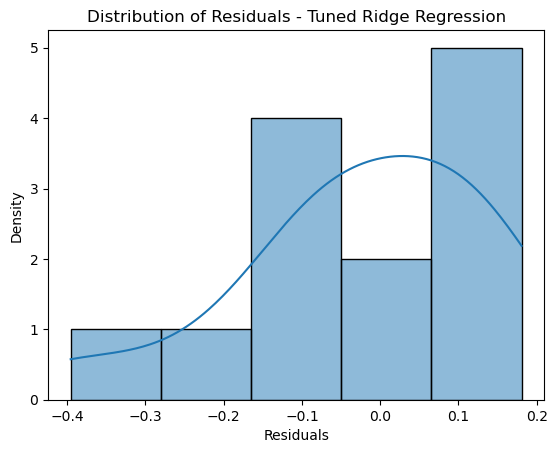

In [53]:
# Calculate residuals
residuals = y_test.values.flatten() - y_pred.flatten()

# Visualize residuals
#sns.kdeplot(residuals)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals - Tuned Ridge Regression')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

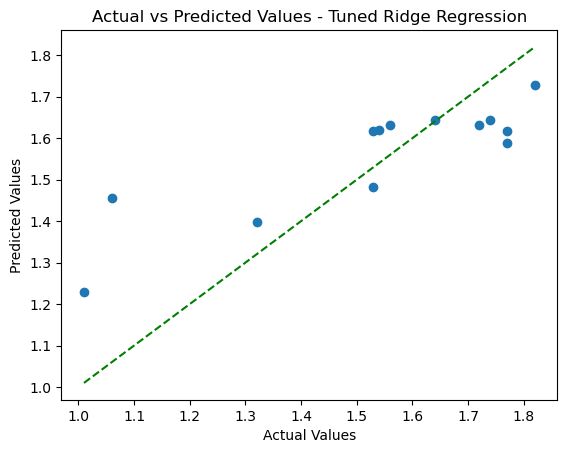

In [54]:
# Line Plot: Actual vs Predicted Values

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='green', label='Actual')
plt.scatter(y_test, y_pred, label='Tuned Ridge Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Tuned Ridge Regression')
plt.show()

**Ploting the Learning Curve**

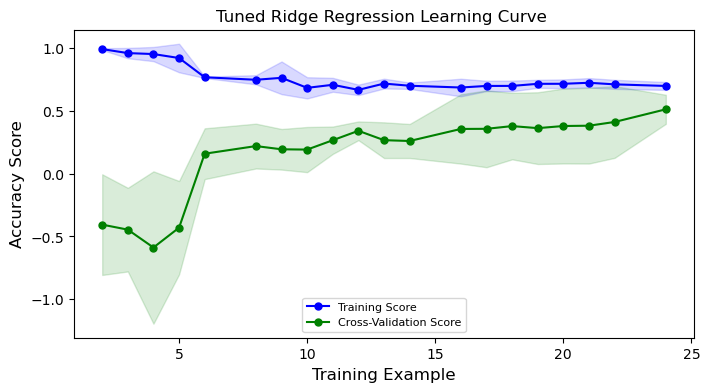

In [55]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=Tuned_Ridge_Reg, 
                                                       X=X_train_transformed, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 20), n_jobs=-1)

plt.figure(figsize=(8,4))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Tuned Ridge Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
plt.show()


In [56]:
#import pickle

#Tuned_Ridge_Reg_model = 'Tuned_Ridge_Reg.sav'
#pickle.dump(model, open(Tuned_Ridge_Reg_model, 'wb'))